#### Name: Ananya Godse SAP ID: 60009220161

## Random Classifier 3 - Behaviour Risk Factor Surveillance System Dataset

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Loading and pre-processing the dataset

In [2]:
df = pd.read_csv("2013.csv")
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_AGE80,_IMPEDUC,_IMPMRTL,_IMPHOME,RCSBRAC1,RCSRACE1,RCHISLA1,RCSBIRTH,TYPEINDS,TYPEWORK
0,1.0,1.0,b'01092013',b'01',b'09',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,60.0,6.0,2.0,1.0,NaN,b'',b'',b'',b'',b''
1,1.0,1.0,b'01192013',b'01',b'19',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,50.0,5.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
2,1.0,1.0,b'01192013',b'01',b'19',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,55.0,6.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
3,1.0,1.0,b'01112013',b'01',b'11',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,64.0,4.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
4,1.0,2.0,b'02062013',b'02',b'06',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,66.0,6.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194483,24.0,4.0,b'04192013',b'04',b'19',b'2013',1100.0,2.013008e+09,2.013008e+09,1.0,...,55.0,4.0,2.0,1.0,NaN,b'',b'',b'',b'',b''
194484,24.0,4.0,b'04182013',b'04',b'18',b'2013',1100.0,2.013008e+09,2.013008e+09,1.0,...,76.0,6.0,3.0,1.0,NaN,b'',b'',b'',b'',b''
194485,24.0,4.0,b'04122013',b'04',b'12',b'2013',1100.0,2.013008e+09,2.013008e+09,1.0,...,80.0,4.0,3.0,1.0,NaN,b'',b'',b'',b'',b''
194486,24.0,5.0,b'05012013',b'05',b'01',b'2013',1100.0,2.013008e+09,2.013008e+09,1.0,...,62.0,6.0,1.0,1.0,NaN,b'',b'',b'',b'',b''


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194488 entries, 0 to 194487
Columns: 336 entries, _STATE to TYPEWORK
dtypes: float64(324), object(12)
memory usage: 498.6+ MB


In [4]:
missing_values = pd.DataFrame(df.isna().sum())

In [5]:
print(missing_values.to_markdown())

|          |      0 |
|:---------|-------:|
| _STATE   |      0 |
| FMONTH   |      0 |
| IDATE    |      0 |
| IMONTH   |      0 |
| IDAY     |      0 |
| IYEAR    |      0 |
| DISPCODE |      0 |
| SEQNO    |      0 |
| _PSU     |      0 |
| CTELENUM |     27 |
| PVTRESD1 |  50683 |
| COLGHOUS | 194479 |
| STATERES |  50685 |
| CELLFON3 |  51717 |
| LADULT   | 194482 |
| NUMADULT |  50692 |
| NUMMEN   |  50692 |
| NUMWOMEN |  50692 |
| GENHLTH  |      2 |
| PHYSHLTH |      8 |
| MENTHLTH |      8 |
| POORHLTH |  92565 |
| HLTHPLN1 |      0 |
| PERSDOC2 |      0 |
| MEDCOST  |      0 |
| CHECKUP1 |      0 |
| SLEPTIM1 |      0 |
| BPHIGH4  |      1 |
| BPMEDS   | 114123 |
| BLOODCHO |      0 |
| CHOLCHK  |  26375 |
| TOLDHI2  |  26374 |
| CVDINFR4 |      0 |
| CVDCRHD4 |      0 |
| CVDSTRK3 |      0 |
| ASTHMA3  |      0 |
| ASTHNOW  | 167789 |
| CHCSCNCR |      0 |
| CHCOCNCR |      0 |
| CHCCOPD1 |      0 |
| HAVARTH3 |      0 |
| ADDEPEV2 |      0 |
| CHCKIDNY |      0 |
| DIABETE3

In [6]:
df['_RFHLTH'].value_counts()

1.0    155421
2.0     38178
9.0       888
Name: _RFHLTH, dtype: int64

In [7]:
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})

In [8]:
df['_RFHLTH'].value_counts()

1.0    155421
0.0     38178
9.0       888
Name: _RFHLTH, dtype: int64

In [9]:
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()

In [10]:
df['_RFHLTH'].value_counts()

1.0    155421
0.0     38178
Name: _RFHLTH, dtype: int64

In [11]:
df = df.rename(columns = {'_RFHLTH': 'Label'})

In [12]:
# Calculate percentage of data in each column
percent_of_data = df.count()*100/9980

In [13]:
# Identify columns with less than 50% data
bad_features = percent_of_data.where(percent_of_data<50).dropna()

In [14]:
# Remove columns with missing values
df = df.drop(columns = bad_features.index.to_list())

In [15]:
# Remove all non float data
df = df.select_dtypes(include=['float64'])
df

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,STATERES,CELLFON3,NUMADULT,...,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_AGE80,_IMPEDUC,_IMPMRTL,_IMPHOME
0,1.0,1.0,1100.0,2.013001e+09,2.013001e+09,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,NaN,NaN,2.0,60.0,6.0,2.0,1.0
1,1.0,1.0,1100.0,2.013001e+09,2.013001e+09,1.0,1.0,1.0,1.0,2.0,...,4.0,1.0,1.0,NaN,NaN,1.0,50.0,5.0,1.0,1.0
2,1.0,1.0,1100.0,2.013001e+09,2.013001e+09,1.0,1.0,1.0,1.0,3.0,...,2.0,1.0,1.0,NaN,NaN,1.0,55.0,6.0,1.0,1.0
3,1.0,1.0,1100.0,2.013001e+09,2.013001e+09,1.0,1.0,1.0,1.0,2.0,...,4.0,1.0,1.0,NaN,NaN,2.0,64.0,4.0,1.0,1.0
4,1.0,2.0,1100.0,2.013001e+09,2.013001e+09,1.0,1.0,1.0,1.0,2.0,...,4.0,1.0,1.0,2.0,2.0,2.0,66.0,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194482,24.0,4.0,1100.0,2.013008e+09,2.013008e+09,1.0,1.0,1.0,1.0,2.0,...,4.0,1.0,2.0,NaN,NaN,2.0,50.0,5.0,1.0,1.0
194483,24.0,4.0,1100.0,2.013008e+09,2.013008e+09,1.0,1.0,1.0,NaN,1.0,...,1.0,1.0,1.0,NaN,NaN,1.0,55.0,4.0,2.0,1.0
194484,24.0,4.0,1100.0,2.013008e+09,2.013008e+09,1.0,1.0,1.0,NaN,1.0,...,2.0,1.0,1.0,1.0,1.0,2.0,76.0,6.0,3.0,1.0
194485,24.0,4.0,1100.0,2.013008e+09,2.013008e+09,1.0,1.0,1.0,NaN,1.0,...,4.0,1.0,1.0,1.0,1.0,2.0,80.0,4.0,3.0,1.0


In [16]:
df = df.drop(columns=['SEX','_STATE','FMONTH','SEQNO','DISPCODE','MARITAL','EDUCA','POORHLTH','PHYSHLTH', 'GENHLTH', 'HLTHPLN1', 'MENTHLTH'])

In [17]:
df.shape

(193599, 261)

In [18]:
df.head()

,_PSU,CTELENUM,PVTRESD1,STATERES,CELLFON3,NUMADULT,NUMMEN,NUMWOMEN,PERSDOC2,MEDCOST,...,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_AGE80,_IMPEDUC,_IMPMRTL,_IMPHOME
0,2.013001e+09,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,NaN,NaN,2.0,60.0,6.0,2.0,1.0
1,2.013001e+09,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,4.0,1.0,1.0,NaN,NaN,1.0,50.0,5.0,1.0,1.0
2,2.013001e+09,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,...,2.0,1.0,1.0,NaN,NaN,1.0,55.0,6.0,1.0,1.0
3,2.013001e+09,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,4.0,1.0,1.0,NaN,NaN,2.0,64.0,4.0,1.0,1.0
4,2.013001e+09,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,4.0,1.0,1.0,2.0,2.0,2.0,66.0,6.0,1.0,1.0


### Splitting the data into training and testing

In [19]:
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [20]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

### Fitting the model and making predicting

In [21]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
predictions = clf.predict(X_test)

### Evaluating Model Performance

In [23]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy without Feature Selection:", accuracy)

Accuracy without Feature Selection: 0.8636880165289256


### Visualizing Feature Importances

In [24]:
imp_features = pd.DataFrame(clf.feature_importances_, index=X.columns)
imp_features.columns=['importance']
imp_features.sort_values(by='importance', ascending=False)

,importance
DIFFWALK,0.035556
QLACTLM2,0.034425
EMPLOY1,0.028535
DIFFALON,0.021196
USEEQUIP,0.016988
...,...
_VEG23,0.000008
CTELENUM,0.000000
CELLFON3,0.000000
STATERES,0.000000


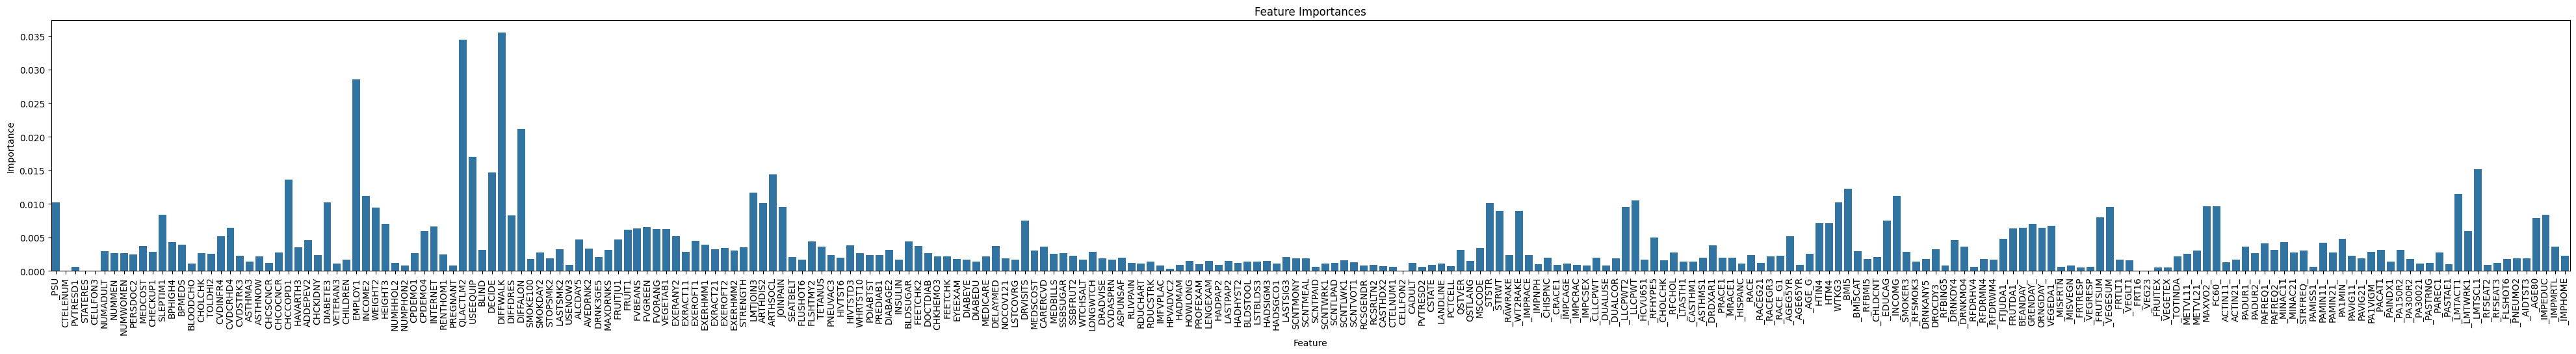

In [25]:
plt.figure(figsize=(50, 5))
sns.barplot(data=imp_features, x=imp_features.index, y='importance').set(xlabel='Feature', ylabel='Importance', title='Feature Importances')
plt.xticks(rotation=90)
plt.show()

### Training a model with only the selected - most important - features

In [26]:
selected_features = imp_features[imp_features['importance'] > 0.00125].index
selected_features

Index(['_PSU', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'PERSDOC2', 'MEDCOST',
       'CHECKUP1', 'SLEPTIM1', 'BPHIGH4', 'BPMEDS',
       ...
       '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_FLSHOT6', '_PNEUMO2', '_AIDTST3',
       '_AGE80', '_IMPEDUC', '_IMPMRTL', '_IMPHOME'],
      dtype='object', length=205)

In [27]:
clf1 = RandomForestClassifier()
clf1.fit(X_train[selected_features], y_train)

RandomForestClassifier()

In [28]:
predictions1 = clf1.predict(X_test[selected_features])

In [29]:
accuracy1 = accuracy_score(y_test, predictions1)
print("Accuracy with Feature Selection: ", accuracy1)

Accuracy with Feature Selection:  0.8642820247933884


The accuracy of the model trained after feature selection is slightly higher than the one trained on all of the features.